# Bank Marketing Model Building & Evaluation

## 1. Import Libraries 

In [8]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve

## 2. Cleaning & Encoding 

In [9]:
# Import dataset
df = pd.read_csv('bank_marketing_cleaned.csv')

# Spliting the data
x = df.drop(columns='y')
y = df['y']

X = pd.get_dummies(x,drop_first=True)

## 3. Train-Test Split & Scaling

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Scalling the numeric features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## 4. Model Building

In [11]:
# logistic Regression
lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)

print("LOGISTIC REGRESSION:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION:
[[6278 1032]
 [  83  845]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.91      0.60       928

    accuracy                           0.86      8238
   macro avg       0.72      0.88      0.76      8238
weighted avg       0.93      0.86      0.88      8238



In [12]:
# Decision Tree 
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("DECISION TREE")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

DECISION TREE
[[6916  394]
 [ 438  490]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7310
           1       0.55      0.53      0.54       928

    accuracy                           0.90      8238
   macro avg       0.75      0.74      0.74      8238
weighted avg       0.90      0.90      0.90      8238



In [13]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RANDOM FOREST")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST
[[6313  997]
 [  68  860]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.46      0.93      0.62       928

    accuracy                           0.87      8238
   macro avg       0.73      0.90      0.77      8238
weighted avg       0.93      0.87      0.89      8238



## 5. Model Evaluation

In [16]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest'],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_pred_rf)
    ]
})

results

,Model,ROC-AUC
0,Logistic Regression,0.884692
1,Decision Tree,0.737059
2,Random Forest,0.895168


In [19]:
cv_scores = cross_val_score(
    rf, X_train, y_train, cv=10, scoring='roc_auc')

print("Mean CV ROC-AUC:", cv_scores.mean())


Mean CV ROC-AUC: 0.9404442395365384


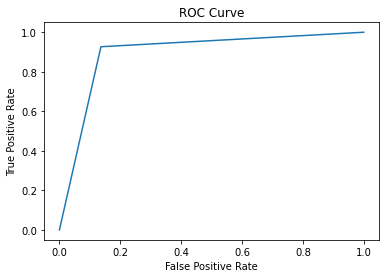

In [23]:
param_grid = {'n_estimators': [100, 200],'max_depth': [8, 10]}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid,scoring='roc_auc',cv=10)
grid.fit(X_train, y_train)


fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## 6. Feature Importance

In [27]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_imp.head(10)

duration            0.408581
no.employed         0.118383
euribor3m           0.097486
emp.var.rate        0.079227
cons.conf.idx       0.049615
cons.price.idx      0.039604
pdays               0.024193
age                 0.022407
poutcome_success    0.022224
month_may           0.016319
dtype: float64

## 7. Conclusion

- This project demonstrates how customer subscription behavior is influenced more by campaign-related and economic factors than by demographic attributes alone. 
- Among the evaluated models, Random Forest achieved the best overall performance by effectively handling feature interactions and class imbalance. 
- Logistic Regression showed strong recall, making it suitable for scenarios where identifying potential subscribers is critical. 
- The findings highlight the importance of improving call engagement strategies and leveraging historical campaign data to enhance marketing effectiveness.